In [31]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [32]:
# CLASS IMPORTS
from YOLO import Yolo

CLASSES = [ "Bird", "Cat", "Dog", "Flower", "Face" ]  # class names

In [33]:
def transform(URL, img_size = 320, int8 = False):
    int_type = np.int8 if int8 else np.float32
    img = io.imread(URL)
    im = cv2.resize(img, (img_size, img_size), 3).astype(int_type)
    im = np.expand_dims(im, axis=0)/255.0
    return img, im

In [34]:
url = "https://images.unsplash.com/photo-1650848187487-43205074dee4?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwyMTYyOTB8MHwxfGFsbHwyNTJ8fHx8fHwyfHwxNjUxMDYzNjY0&ixlib=rb-1.2.1&q=80&w=400"
is_qantized = False

In [35]:
def urlRoute():

    URL = url
    int8 = is_qantized
    img, im = transform(URL)

    MODEL_PATH = 'tflite_models/custom_int800.tflite' if int8 else 'tflite_models/custom01.tflite'
    YOLO = Yolo(model_path = MODEL_PATH, CLASSES = CLASSES, int8 = int8)

    H = img.shape[0]
    W = img.shape[1]
    YOLO.pred(im)

    scores = YOLO.YOLOdetect()
    bbox = YOLO.return_bbox(scores)
    data = YOLO.return_results(scores, bbox, H, W)

    del YOLO, bbox, scores

    return data, img

In [36]:
data, img = urlRoute()
data

{'class_names': ['Dog'],
 'class_scores': [90],
 'coordinates': [[60, 48, 309, 577]],
 'final': [[[60, 48, 309, 577], 90, 'Dog']]}

In [37]:
data["final"][0]

[[60, 48, 309, 577], 90, 'Dog']

In [38]:
for [a,b,c] in data["final"]:
    print(a,b,c)

[60, 48, 309, 577] 90 Dog


In [39]:
def show_results(img, data):
    for [coordinates, score, class_name] in data["final"]:
        coordinates = [int(x) for x in coordinates]
        xmin, ymin, xmax, ymax = coordinates
        text = f"{class_name} : {score}%"
        cv2.rectangle(img, (int(xmin),int(ymin)), (int(xmax),int(ymax)), (225, 100, 0), 3)
        cv2.putText(img, text, (int(xmin), int(ymin)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    plt.imshow(img)
    plt.show()

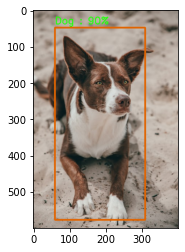

In [40]:
show_results(img, data)